In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Churn', ylabel='count'>

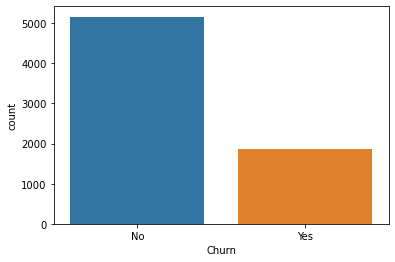

In [8]:
sns.countplot(x = 'Churn', data=df)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

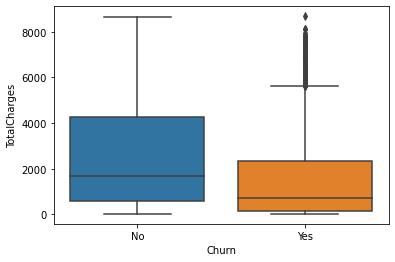

In [9]:
sns.boxplot(x ='Churn',y='TotalCharges',data=df)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

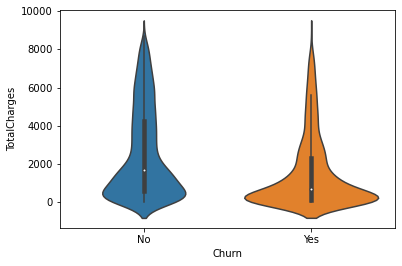

In [10]:
sns.violinplot(x = df['Churn'],y='TotalCharges',data=df)

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

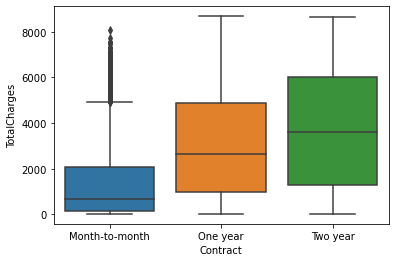

In [11]:
sns.boxplot(y='TotalCharges', x='Contract', data = df)

In [66]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [67]:
corr_df = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

In [68]:
corr_df = pd.DataFrame(corr_df)

In [69]:
corr_df

,Churn_Yes
Contract_Two year,-0.301552
StreamingMovies_No internet service,-0.227578
StreamingTV_No internet service,-0.227578
TechSupport_No internet service,-0.227578
DeviceProtection_No internet service,-0.227578
OnlineBackup_No internet service,-0.227578
OnlineSecurity_No internet service,-0.227578
InternetService_No,-0.227578
PaperlessBilling_No,-0.191454
Contract_One year,-0.178225


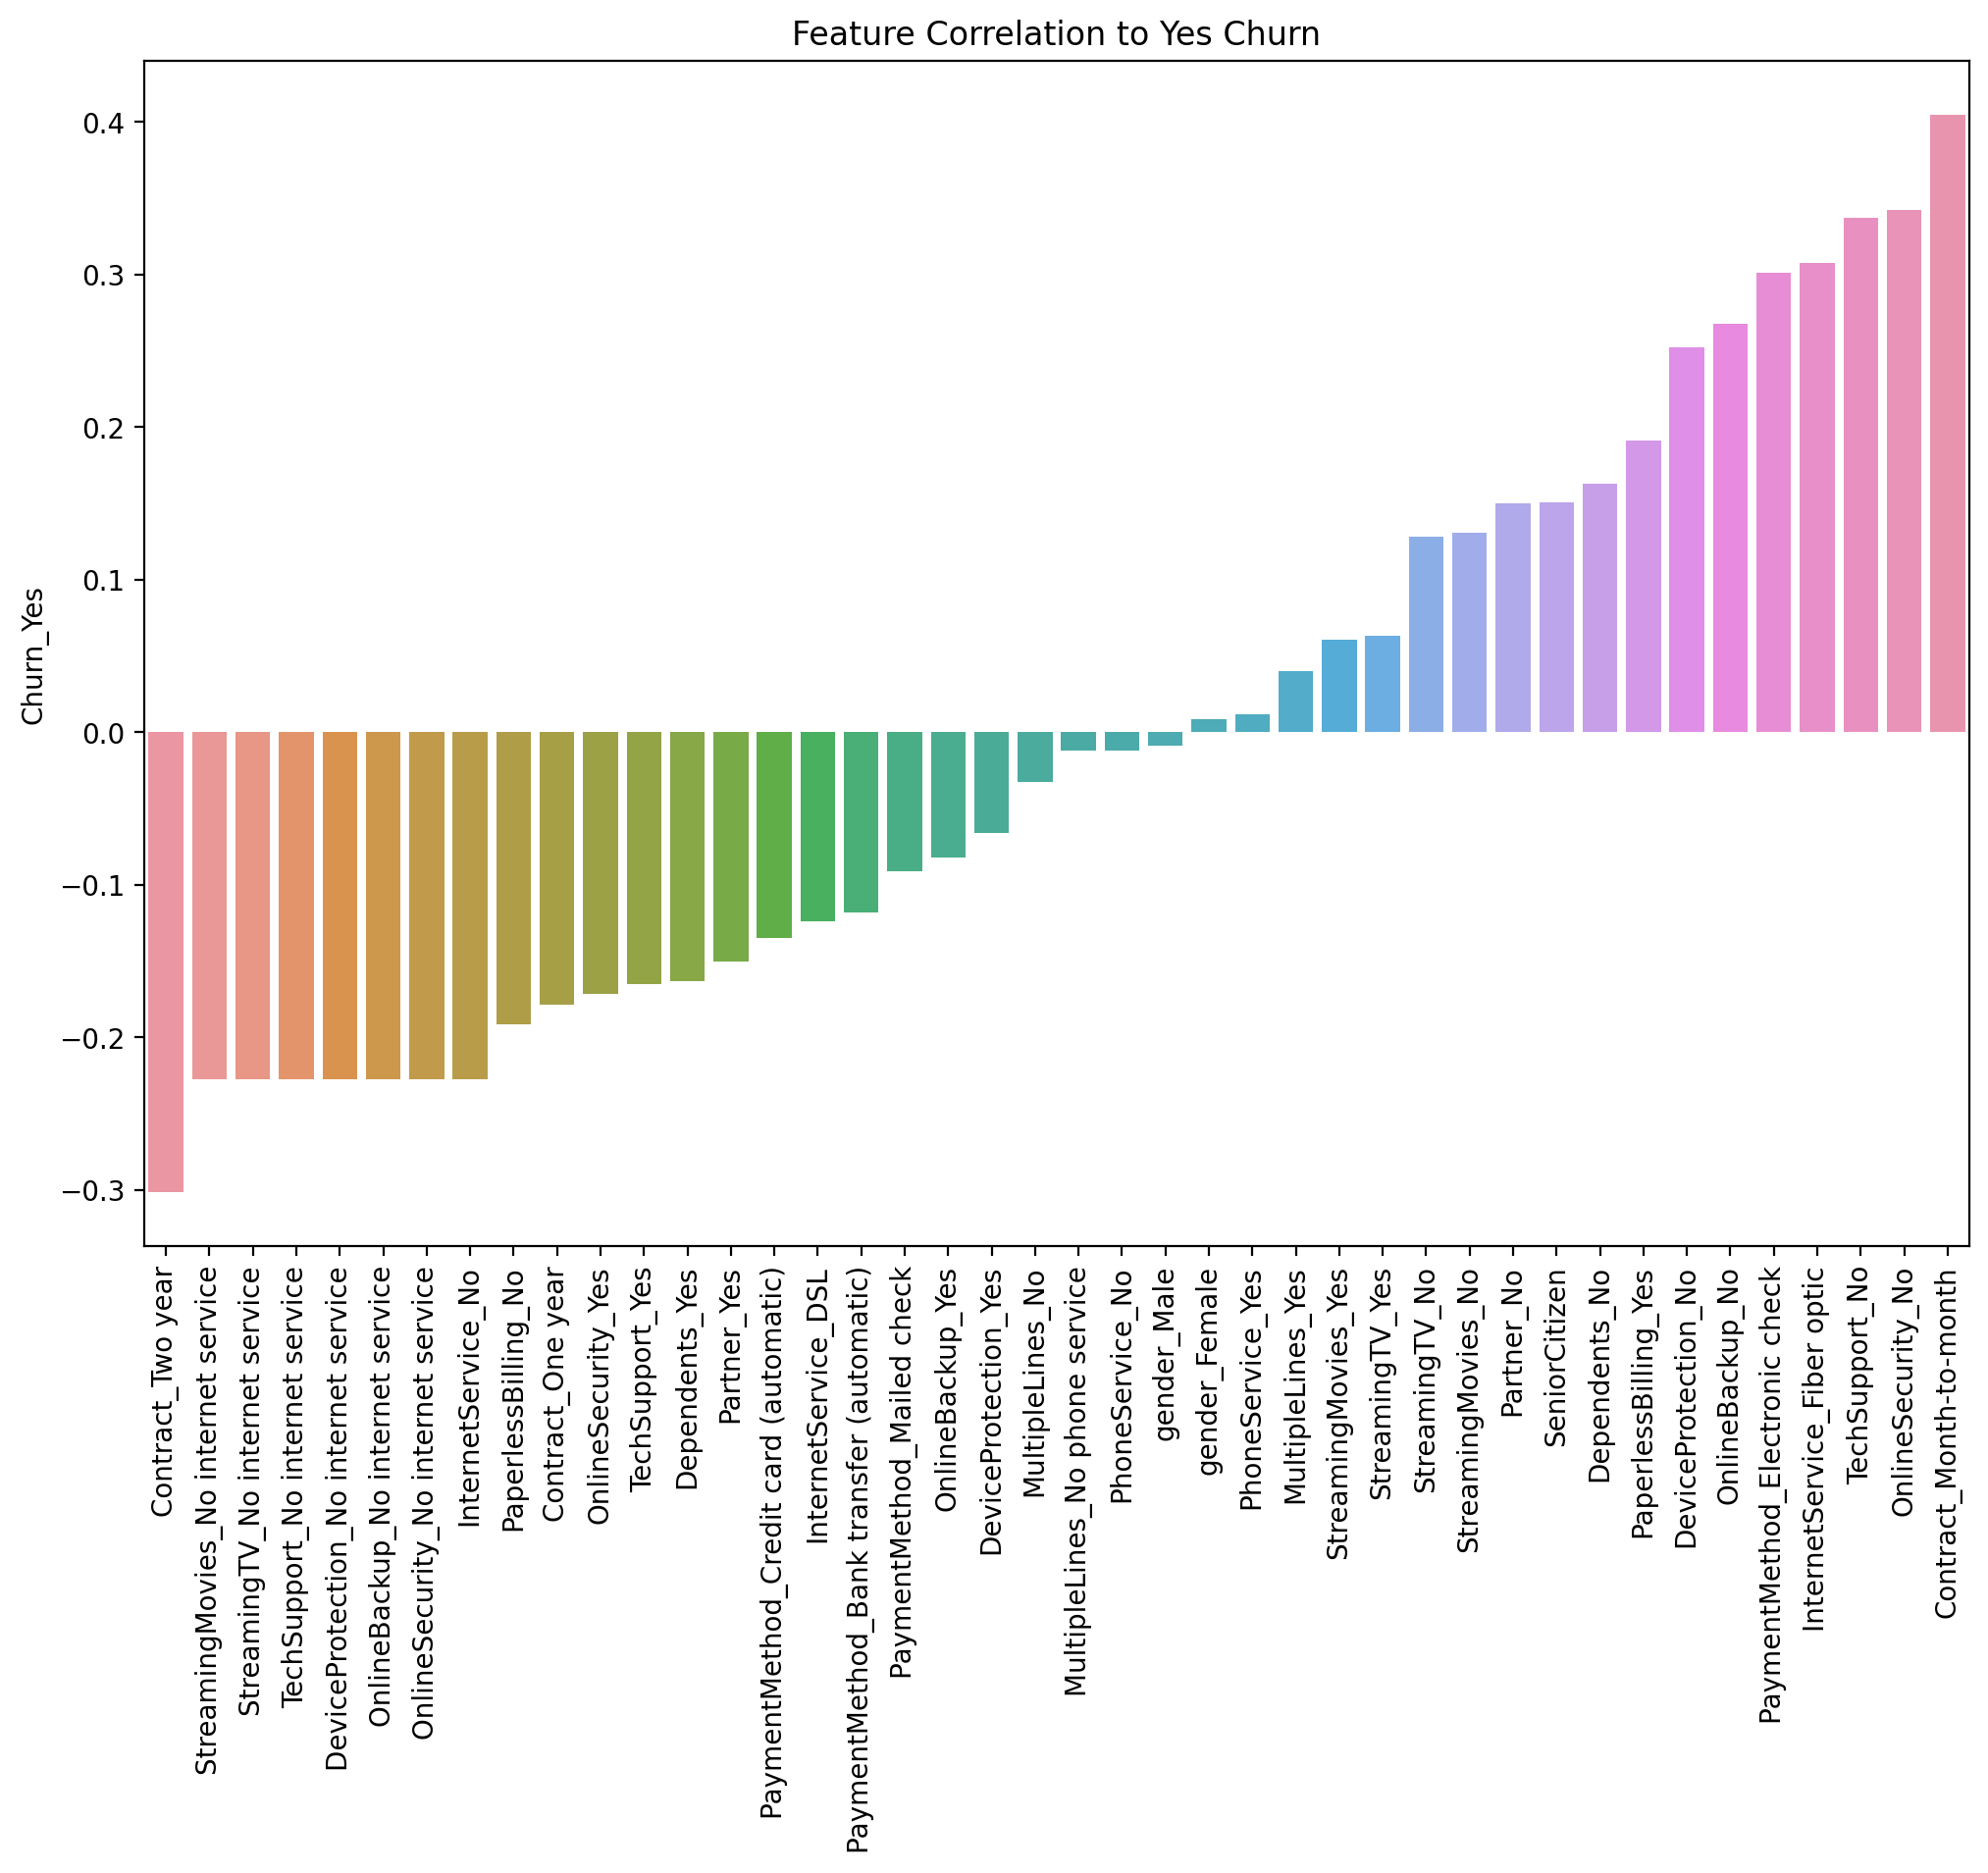

In [73]:
plt.figure(figsize = (12,8), dpi = 200)
sns.barplot(data = corr_df, x = corr_df.index, y='Churn_Yes')
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation =90);

### CHURN ANALYSIS

In [76]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

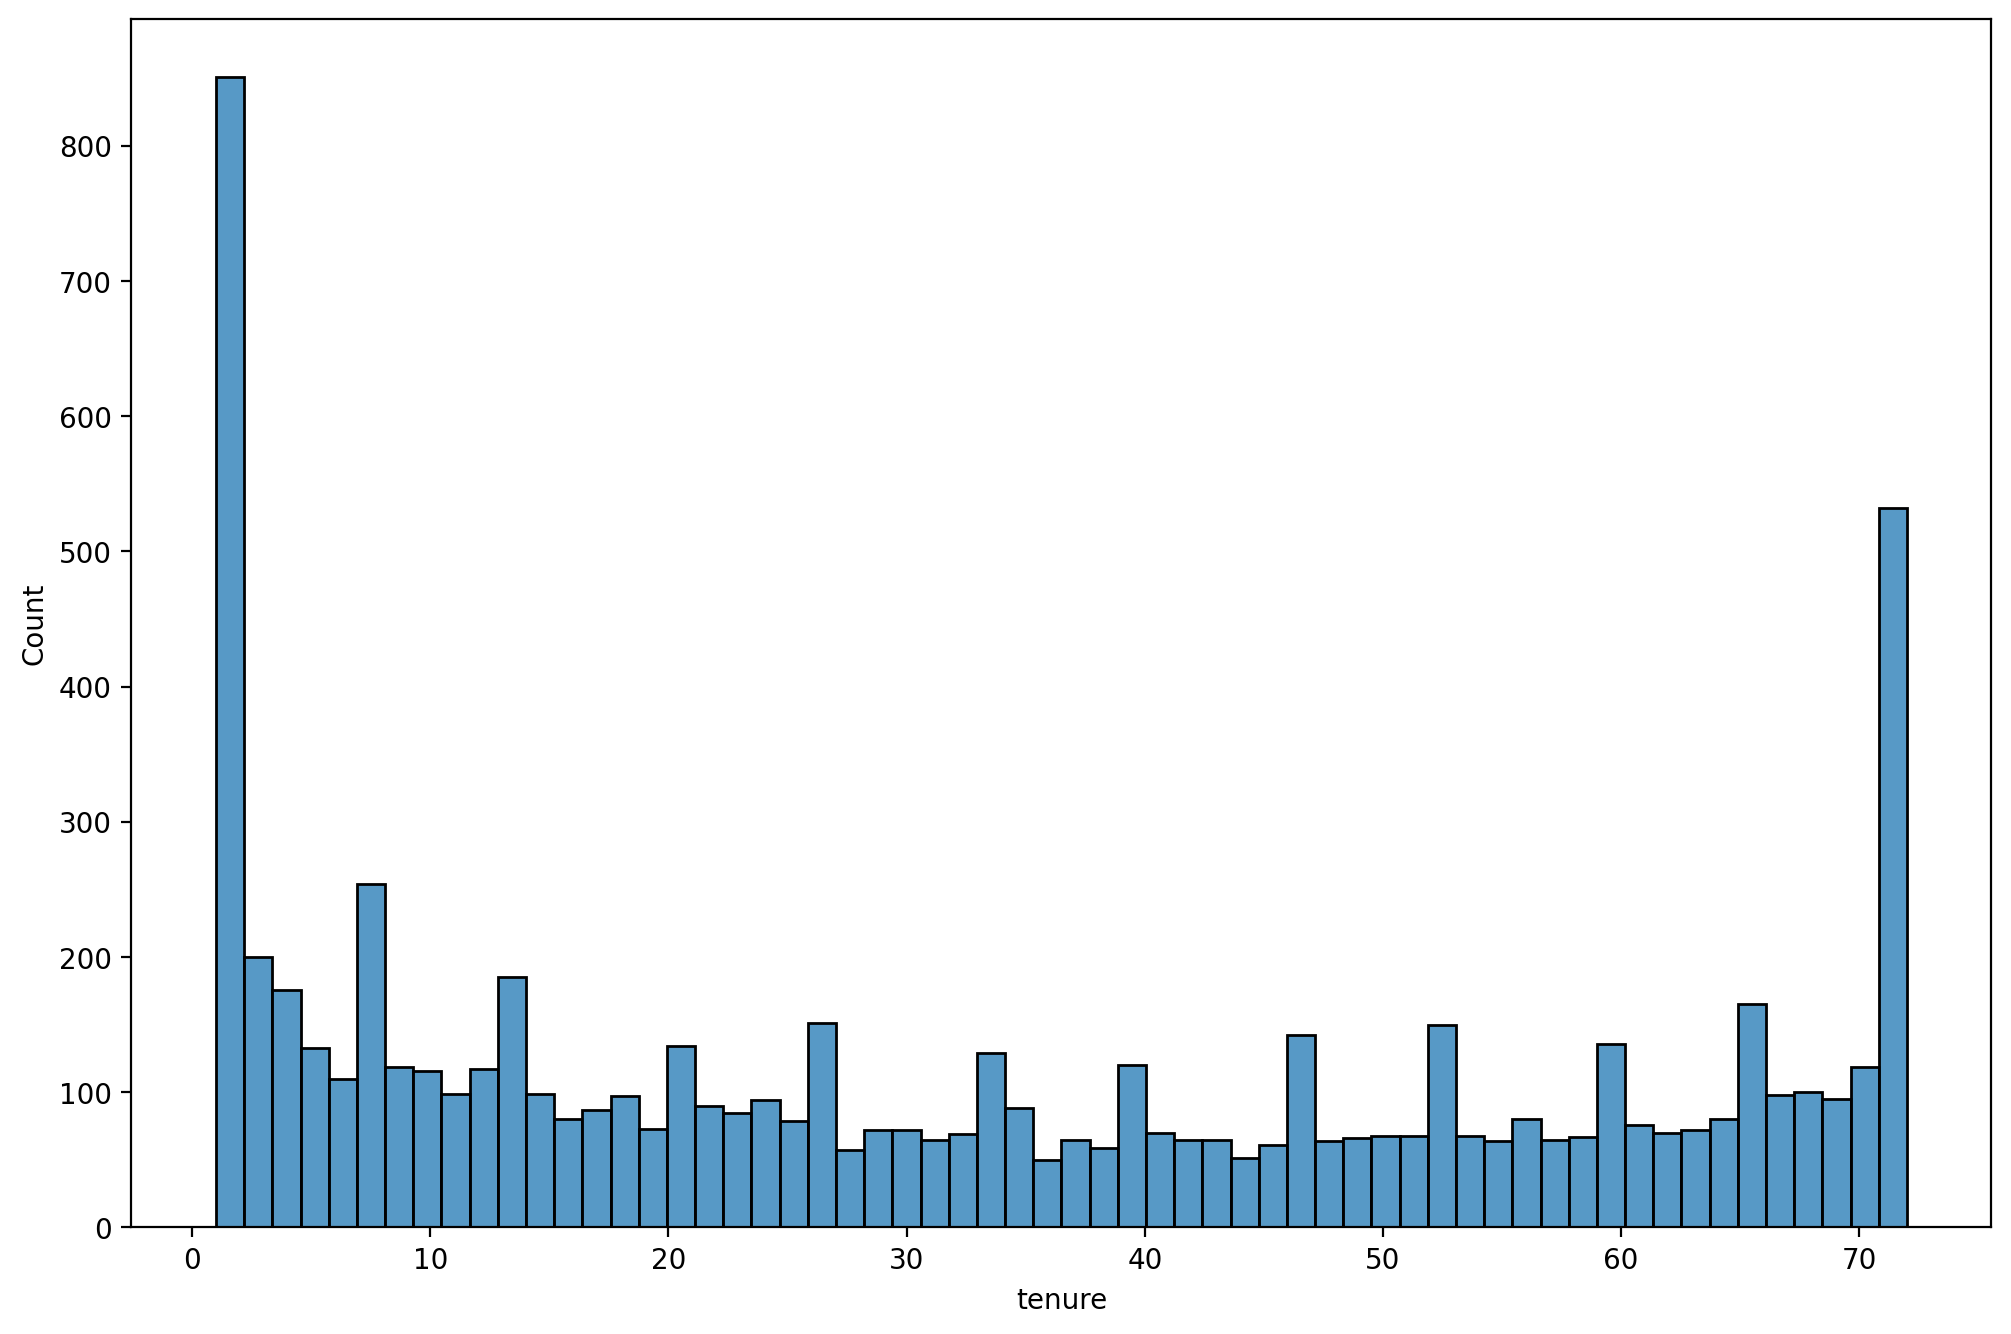

In [86]:
plt.figure(figsize=(12,8), dpi = 200)
sns.histplot(data=df, x='tenure', bins =60)

<Figure size 2400x1600 with 0 Axes>

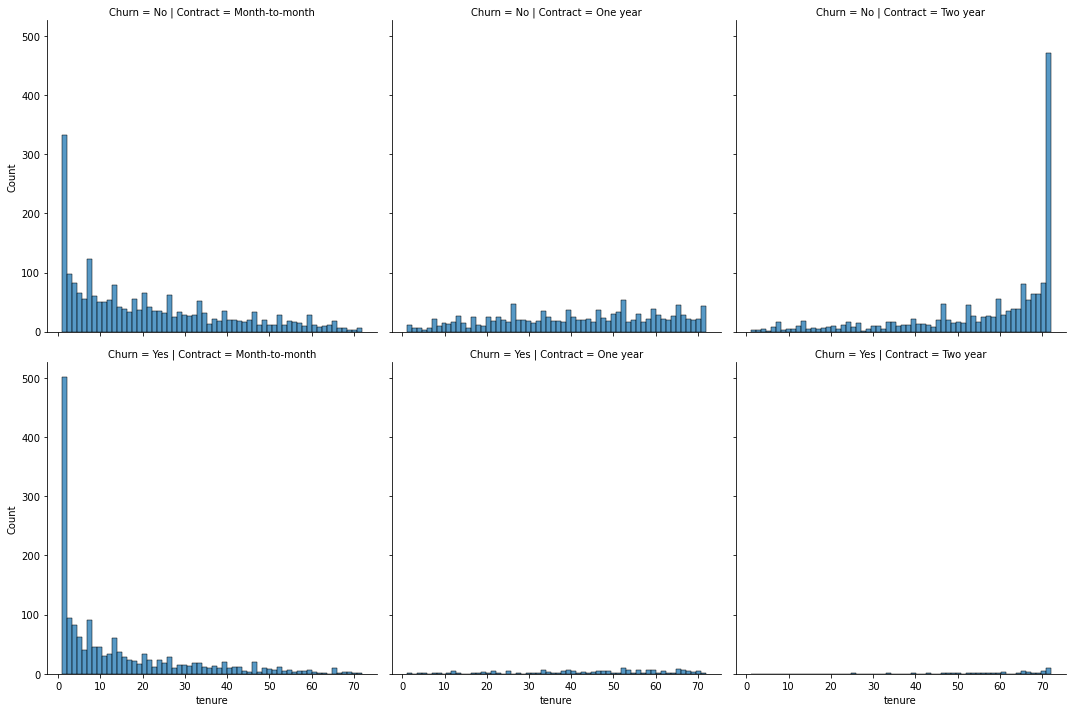

In [98]:
plt.figure(figsize=(12,8), dpi = 200)
sns.displot(data=df, x='tenure', bins=60, col='Contract', row='Churn');


<Figure size 2400x1600 with 0 Axes>

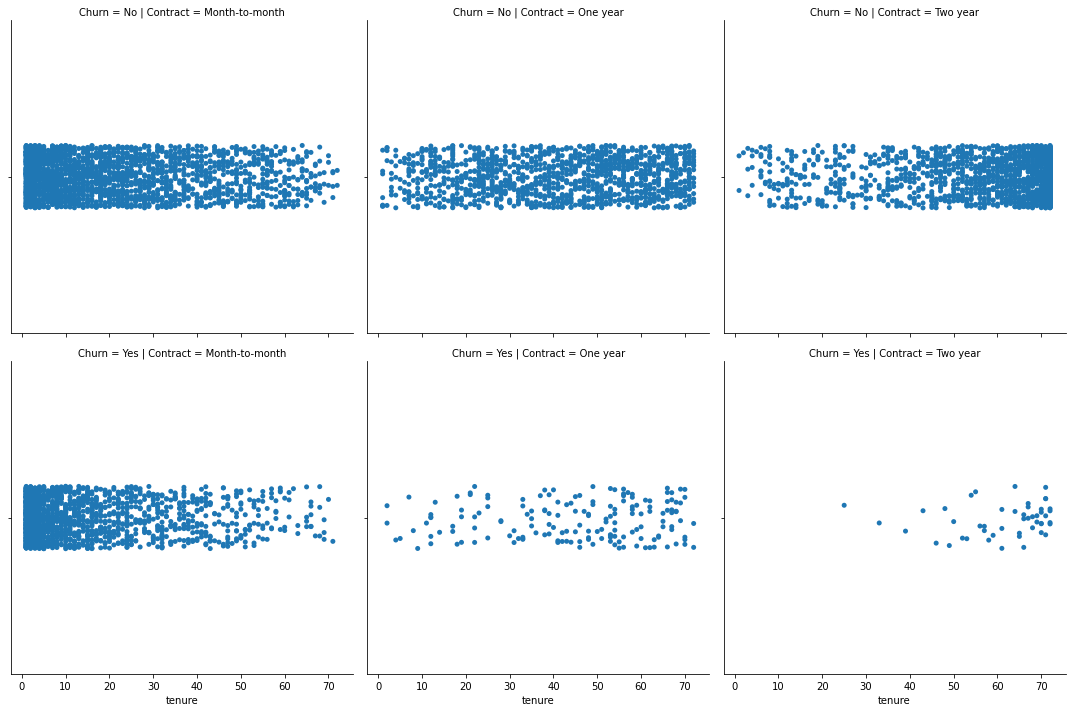

In [102]:
plt.figure(figsize=(12,8), dpi = 200)
sns.catplot(data=df, x='tenure', col='Contract', row='Churn');

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

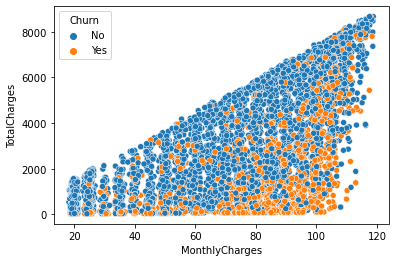

In [100]:
sns.scatterplot(data=df, y='TotalCharges', x='MonthlyCharges', hue='Churn')

### CREATING COHORT ON THE BASIS OF TENURE

In [132]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [133]:
yes_churn = yes_churn.transpose()

In [134]:
yes_churn = yes_churn['customerID']

In [135]:
yes_churn

tenure
1     380
2     123
3      94
4      83
5      64
     ... 
68      9
69      8
70     11
71      6
72      6
Name: customerID, Length: 72, dtype: int64

In [164]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']
no_churn = no_churn.transpose()

In [166]:
no_churn = no_churn['customerID']

In [167]:
no_churn

tenure
1     233
2     115
3     106
4      93
5      69
     ... 
68     91
69     87
70    108
71    164
72    356
Name: customerID, Length: 72, dtype: int64

In [168]:
total_churn = yes_churn + no_churn

In [169]:
total_churn

tenure
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: customerID, Length: 72, dtype: int64

In [172]:
churn_percent = (yes_churn/total_churn)*100

In [173]:
churn_percent

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64